In [8]:
if (!require('caret')) install.packages('caret')
if (!require('MLmetrics')) install.packages('MLmetrics')
if (!require('e1071')) install.packages('e1071')

In [24]:

library(readxl)
library(caret)
library(MLmetrics)
library(ROCR)
library(e1071)

CARGA DE DATOS Y EXPLORACIÓN

```
# Esto tiene formato de código
```



In [18]:
set.seed(159)

# Obtener la ruta de un archivo XLSX de ejemplo del paquete
df <-read_excel("/content/gifts_historico.xlsx")


str(df)
head(df)


tibble [249 × 16] (S3: tbl_df/tbl/data.frame)
 $ Id                      : num [1:249] 46314 46448 46732 46882 47001 ...
 $ genero                  : chr [1:249] "M" "M" "M" "Nina" ...
 $ edad                    : num [1:249] 17 16 18 13 12 7 18 9 17 5 ...
 $ comportamiento_escolar  : chr [1:249] "ALTO" "MEDIO" "ALTO" "ALTO" ...
 $ Obediencia_hogar        : num [1:249] 1 5 3 6 7 5 6 9 2 2 ...
 $ Intereses               : chr [1:249] "Video Juegos" "Video Juegos" "Video Juegos" "Juegos de Mesa" ...
 $ Socioeconomía           : num [1:249] 4 3 1 6 3 3 1 1 1 3 ...
 $ Actividades_comunitarias: chr [1:249] "No" "Si" "No" "No" ...
 $ Num_hermanos            : num [1:249] 1 5 5 2 4 3 0 4 5 2 ...
 $ Vivienda                : chr [1:249] "RURAL" "URBANA" "RURAL" "RURAL" ...
 $ Estado_Salud            : chr [1:249] "BAJO" "BAJO" "BAJO" "REGULAR" ...
 $ Religion_Familiar       : chr [1:249] "Catolicismo Romano" "Cristianismo" "Cristianismo" "Catolicismo Romano" ...
 $ Actividades_deportivas  : nu

Id,genero,edad,comportamiento_escolar,Obediencia_hogar,Intereses,Socioeconomía,Actividades_comunitarias,Num_hermanos,Vivienda,Estado_Salud,Religion_Familiar,Actividades_deportivas,Actividades_atrísticas,Aptitudes_científicas,reciberegalo
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
46314,M,17,ALTO,1,Video Juegos,4,No,1,RURAL,BAJO,Catolicismo Romano,1,0,0,0
46448,M,16,MEDIO,5,Video Juegos,3,Si,5,URBANA,BAJO,Cristianismo,1,0,0,0
46732,M,18,ALTO,3,Video Juegos,1,No,5,RURAL,BAJO,Cristianismo,0,0,0,0
46882,Nina,13,ALTO,6,Juegos de Mesa,6,No,2,RURAL,REGULAR,Catolicismo Romano,0,1,1,0
47001,M,12,ALTO,7,Video Juegos,3,No,4,RURAL,BAJO,Protestantismo,0,1,0,1
47113,F,7,ALTO,5,Juegos de Mesa,3,No,3,URBANA,REGULAR,Cristianismo,0,0,0,0


PREPARACION DE LOS DATOS

In [19]:
df$genero<-as.factor(df$genero)
df$comportamiento_escolar<-as.factor(df$comportamiento_escolar)
df$Intereses<-as.factor(df$Intereses)
df$Actividades_comunitarias<-as.factor(df$Actividades_comunitarias)
df$Vivienda<-as.factor(df$Vivienda)
df$Estado_Salud<-as.factor(df$Estado_Salud)
df$Religion_Familiar<-as.factor(df$Religion_Familiar)
df$reciberegalo<-as.factor(df$reciberegalo)
df$reciberegalo<-factor(df$reciberegalo,ordered=TRUE, levels=c("0","1"))

SÉPARACION DE DATOS DE ENTRENAMIENTO Y PRUEBA

In [20]:
set.seed(159)
#aquí se define el tamaño de la muestra, en este caso entrenamiento tendrá el 75% de los casos
sample <- sample.int(nrow(df), floor(.75*nrow(df)))
train_data <- df[sample, ]
test_data <- df[-sample, ]


MODELO

In [26]:

set.seed(159)

cross <- trainControl(method = "cv", number = 10)
modeloknn1 <- train(
  reciberegalo~ .,
  data = train_data,
  method = "knn",
  tuneGrid = expand.grid(k = 1:30),
  trControl = cross,
  metric = "Accuracy"
)



k-Nearest Neighbors 

186 samples
 15 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 167, 167, 168, 168, 167, 167, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa        
   1  0.5801170  -0.0470161155
   2  0.5640351  -0.1201774524
   3  0.6605263  -0.0057512790
   4  0.6707602   0.0185943639
   5  0.6929825   0.0233103148
   6  0.6602339  -0.0687573885
   7  0.7038012   0.0018033082
   8  0.6929825  -0.0034325109
   9  0.6932749  -0.0265312114
  10  0.7149123   0.0282020607
  11  0.6766082  -0.0727491599
  12  0.7040936  -0.0117614314
  13  0.7201754  -0.0009801198
  14  0.7146199   0.0061234909
  15  0.7149123  -0.0279031967
  16  0.7201754  -0.0036467046
  17  0.7257310  -0.0096153846
  18  0.7257310  -0.0096153846
  19  0.7257310  -0.0096153846
  20  0.7309942   0.0000000000
  21  0.7309942   0.0000000000
  22  0.7309942   0.0000000000
  23  0.7309942   0.0000000000
  24  0.7309942   0.0

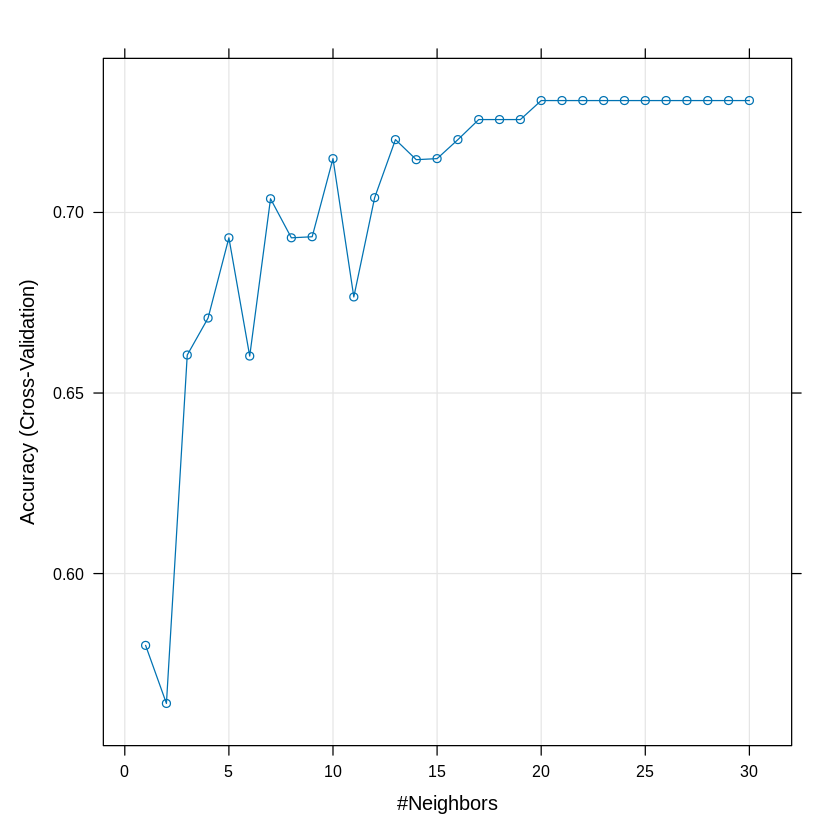

In [27]:
modeloknn1
plot(modeloknn1)

EVALUACIÓN DEL MODELO CON DATOS DE PRUEBA

In [28]:
predmod1<-predict(modeloknn1,newdata = test_data)
predmod1 <- factor(predmod1, levels = levels(test_data$reciberegalo))
confusionMatrix(predmod1, test_data$reciberegalo)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 52 11
         1  0  0
                                         
               Accuracy : 0.8254         
                 95% CI : (0.709, 0.9095)
    No Information Rate : 0.8254         
    P-Value [Acc > NIR] : 0.579633       
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 0.002569       
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.8254         
         Neg Pred Value :    NaN         
             Prevalence : 0.8254         
         Detection Rate : 0.8254         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 0              
                                         

1.El mejor valor de K desde el punto de vista ACCURACY es K=20, El programa anuncia que el mejor ACCURACY seria de k=30, sin embargo el accuracy y el kapa son iguales desde K=20, por esta razon se seleciona 20

OVERFITTING

In [33]:

modeloknn_overfit <- train(
  reciberegalo~ .,
  data = train_data,
  method = "knn",
  tuneGrid = expand.grid(k = 1),
  trControl = cross,
  metric = "Accuracy"
)


pred_knn_overfit <- predict(modeloknn_overfit, newdata = test_data)
pred_knn_overfit <- factor(pred_knn_overfit, levels = levels(test_data$reciberegalo))


cat("Resultados con Overfitting (K = 1):\n")
confusionMatrix(pred_knn_overfit, test_data$reciberegalo)



Resultados con Overfitting (K = 1):


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 41  9
         1 11  2
                                          
               Accuracy : 0.6825          
                 95% CI : (0.5531, 0.7942)
    No Information Rate : 0.8254          
    P-Value [Acc > NIR] : 0.9983          
                                          
                  Kappa : -0.0277         
                                          
 Mcnemar's Test P-Value : 0.8231          
                                          
            Sensitivity : 0.7885          
            Specificity : 0.1818          
         Pos Pred Value : 0.8200          
         Neg Pred Value : 0.1538          
             Prevalence : 0.8254          
         Detection Rate : 0.6508          
   Detection Prevalence : 0.7937          
      Balanced Accuracy : 0.4851          
                                          
       'Positive' Class : 0               
                                    

 El modelo tiene baja precisión y un recall aceptable
 Este se debe a que los datos se sobreajustaron a los datos de entrenamiento y a la hora de probar el modelo con los datos de prueba, no se obtienen los resultados esperados


UNDERFITTING

In [30]:

modeloknn_underfit <- train(
  reciberegalo~ .,
  data = train_data,
  method = "knn",
  tuneGrid = expand.grid(k = 30),
  trControl = cross,
  metric = "Accuracy"
)


pred_knn_underfit <- predict(modeloknn_underfit, newdata = test_data)
pred_knn_underfit <- factor(pred_knn_underfit, levels = levels(test_data$reciberegalo))

cat("Resultados con Underfitting (K = 30):\n")
confusionMatrix(pred_knn_underfit, test_data$reciberegalo)



Resultados con Underfitting (K = 30):


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 52 11
         1  0  0
                                         
               Accuracy : 0.8254         
                 95% CI : (0.709, 0.9095)
    No Information Rate : 0.8254         
    P-Value [Acc > NIR] : 0.579633       
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 0.002569       
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.8254         
         Neg Pred Value :    NaN         
             Prevalence : 0.8254         
         Detection Rate : 0.8254         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 0              
                                         

En este caso cuando k=30 la accuracy es de 0.82 y el recall de 1 y especificidad de 0, lo que quiere decir que el modelo se vuelve practicamnete mas "promedio" en las predicciones, provocando que no detecte bien muchas instancias.
